In [1]:
# Clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 17022, done.
remote: Total 17022 (delta 0), reused 0 (delta 0), pack-reused 17022 (from 1)
Receiving objects: 100% (17022/17022), 15.62 MiB | 17.67 MiB/s, done.
Resolving deltas: 100% (11695/11695), done.


In [2]:
%cd yolov5

/content/yolov5


In [3]:
# Install dependencies
!pip install -U -r requirements.txt

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the image (you can replace the 'path_to_image' with your image file path)
image = Image.open('/content/peastest1.jpg')

# Display original image size
print("Original size:", image.size)

# Resize the image to 640x640
resized_image = image.resize((640, 640))

# Save the resized image
resized_image.save('resized_image_peastest1.jpg')

# Display resized image size
print("Resized size:", resized_image.size)

# Show the resized image
plt.imshow(resized_image)
plt.axis('off')  # Turn off axis labels
plt.show()

In [16]:
!python /content/yolov5/detect.py --weights /content/finalmodel.pt --img 640 --conf 0.25 --source /content/testimage3.jpeg --save-txt --save-conf

detect: weights=['/content/finalmodel.pt'], source=/content/testimage3.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-378-g2f74455a Python-3.10.12 torch-2.5.0+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7037095 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/testimage3.jpeg: 576x640 1 GREEN-PEAS, 1 Onion, 1 capsicum, 2 potatos, 496.6ms
Speed: 5.3ms pre-process, 496.6ms inference, 1.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp3
1 labels saved to runs/detect/exp3/labels


In [17]:
# List of classes in your model
class_names = ['Button-mushroom', 'GREEN-PEAS', 'Onion', 'brinjal', 'cabbage', 'capsicum', 'corn', 'okra', 'potato', 'tomato']

# Function to parse the detection results
def parse_detection_results(txt_file_path):
    detected_classes = []
    with open(txt_file_path, 'r') as file:
        for line in file:
            class_id = int(line.strip().split()[0])  # Extract class ID from each line
            class_name = class_names[class_id]       # Map class ID to class name
            detected_classes.append(class_name)
    return detected_classes

# Example usage
txt_file_path = '/content/yolov5/runs/detect/exp3/labels/testimage3.txt'  # Adjust this path as needed
detected_classes = parse_detection_results(txt_file_path)

# Print the detected classes
print("Detected classes:", detected_classes)

Detected classes: ['potato', 'potato', 'GREEN-PEAS', 'Onion', 'capsicum']


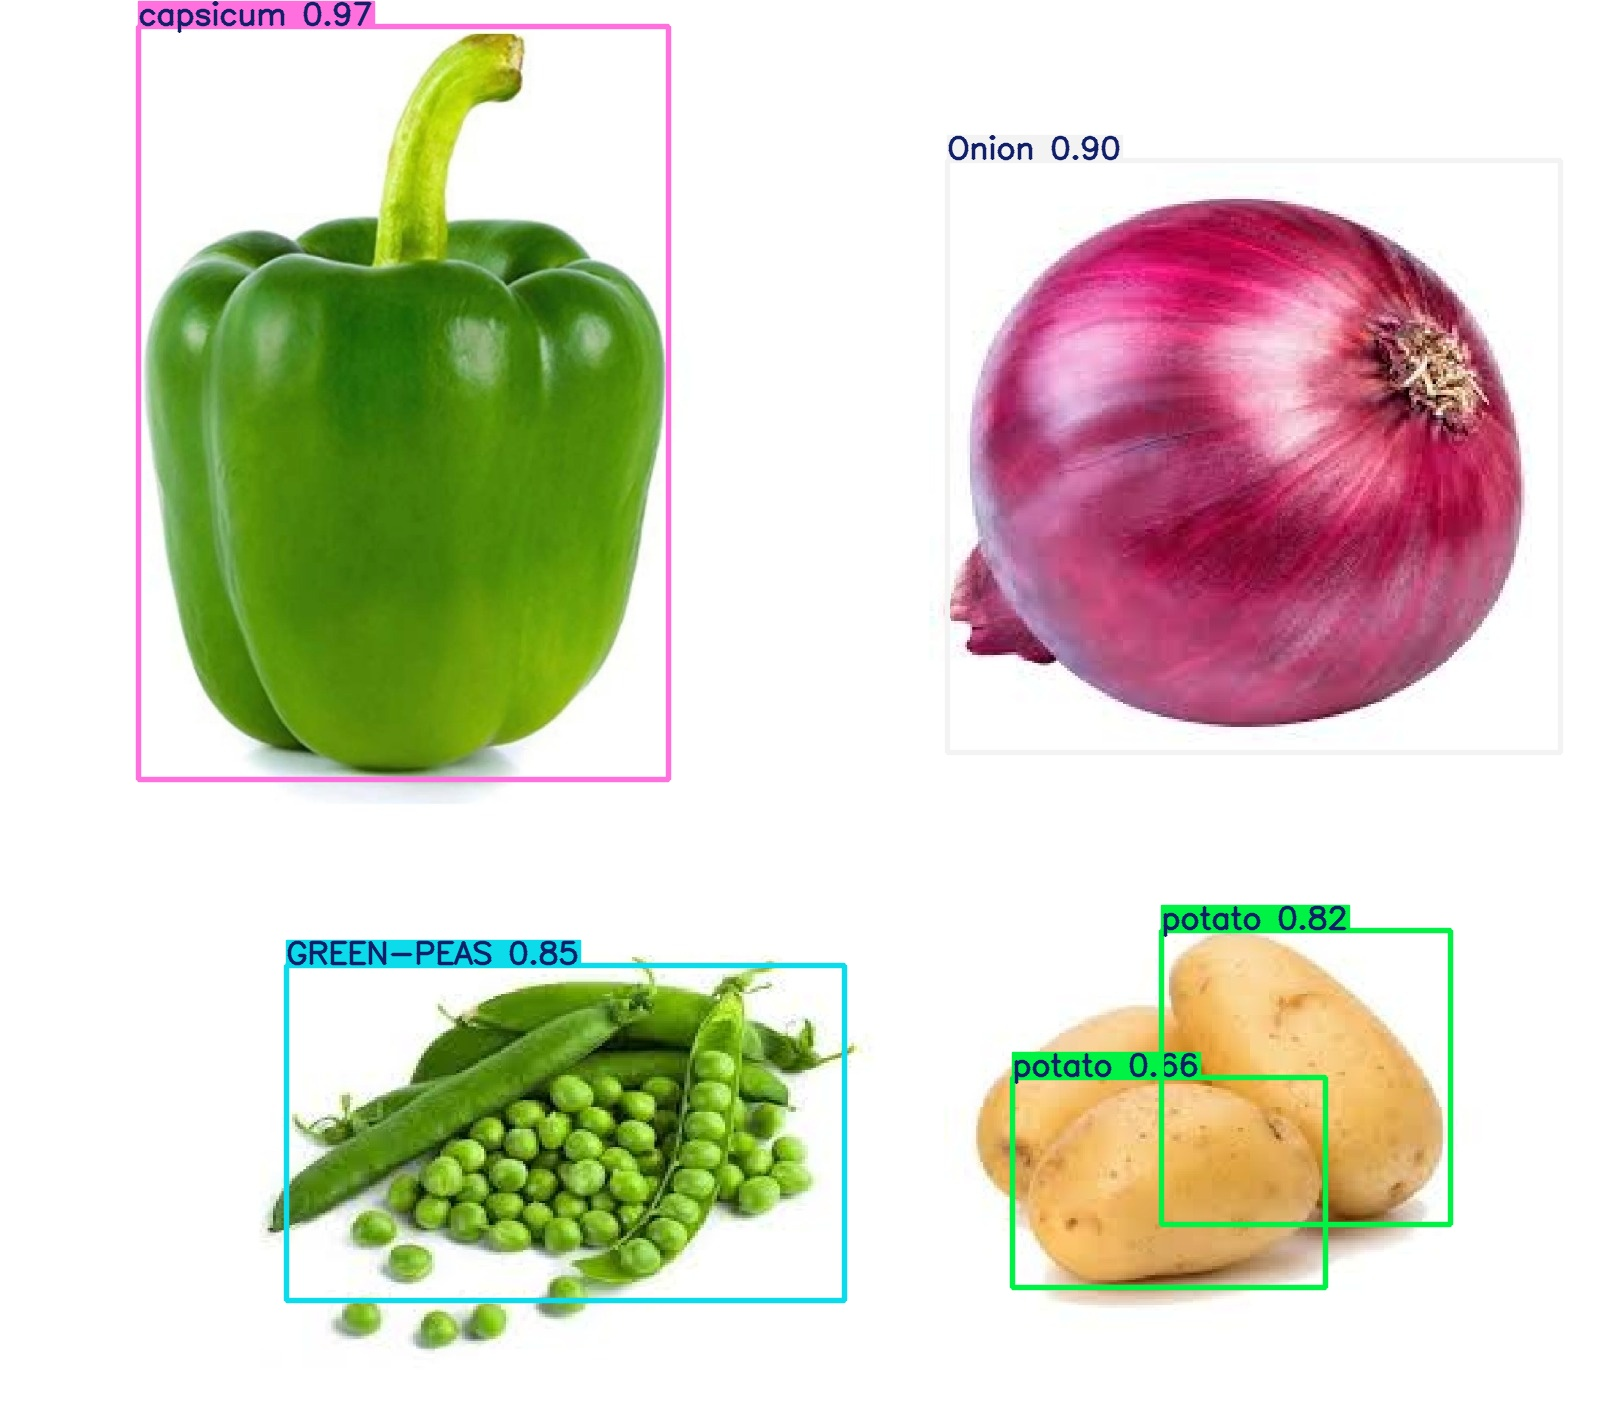

In [20]:
from IPython.display import Image

# Replace the filename with your actual image path
Image(filename='/content/yolov5/runs/detect/exp3/testimage3.jpeg', width=1000)

In [18]:
import pandas as pd

# Function to find dishes that can be made with at least 50% of ingredients
def find_dishes(available_ingredients, dataset):
    # Convert all available ingredients to lowercase to ignore case sensitivity
    available_ingredients = [ingredient.lower() for ingredient in available_ingredients]

    # List to store the matching dishes, missing ingredients, and extra ingredients
    results = []

    # Iterate through the dataset to check for matching dishes
    for index, row in dataset.iterrows():
        dish_name = row['Dish Name']
        # Convert required ingredients to lowercase
        required_ingredients = [ingredient.lower() for ingredient in row['Ingredients'].split(', ')]

        # Find matching ingredients (ignoring case)
        available_count = sum(ingredient in available_ingredients for ingredient in required_ingredients)

        # If 50% or more ingredients are available
        if available_count / len(required_ingredients) >= 0.3:
            # Calculate missing ingredients
            missing_ingredients = [ingredient for ingredient in required_ingredients if ingredient not in available_ingredients]

            # Calculate extra ingredients that are available but not needed for the dish
            extra_ingredients = [ingredient for ingredient in available_ingredients if ingredient not in required_ingredients]

            # Append the results with dish name, missing ingredients, and extra ingredients
            results.append({
                'Dish': dish_name,
                'Missing Ingredients': ', '.join(missing_ingredients) if missing_ingredients else 'None',
                'Extra Ingredients': ', '.join(extra_ingredients) if extra_ingredients else 'None'
            })

    # Output formatting as a table
    if results:
        df = pd.DataFrame(results)
        return df
    else:
        return pd.DataFrame([{'Dish': 'No dish can be prepared', 'Missing Ingredients': 'N/A', 'Extra Ingredients': 'N/A'}])

In [19]:
# Example usage:
dataset = pd.read_csv('/content/food_Sheet1.csv')

dishes = find_dishes(detected_classes, dataset)

# Display the table of results
print(dishes)

                           Dish                          Missing Ingredients  \
0            Vegetable Stir Fry  button mushrooms, green peas, corn, cabbage   
1         Mixed Vegetable Curry                     tomato, brinjal, cabbage   
2  Potato and Capsicum Stir Fry                                   green peas   
3      Brinjal and Tomato Curry                  brinjal, tomato, green peas   
4           Corn and Peas Salad                             corn, green peas   

            Extra Ingredients  
0  potato, potato, green-peas  
1                  green-peas  
2                  green-peas  
3        green-peas, capsicum  
4  potato, potato, green-peas  
